# Project 3, Analyzing Employees Attrition with Python

# 3.1 **Project Objectives Definition**

**Project Goals**- (Employee Attrition Analysis)

**Project Objective**:
The goal of this project is to analyze employee attrition within a company and identify key factors that influence employee turnover. By understanding these factors, HR professionals can take proactive steps to reduce attrition and improve employee retention.

**Research Questions**:
- What are the main factors influencing employee attrition?
- Is there a correlation between salary level and attrition rates?
- Does tenure (years at the company) impact the likelihood of leaving?
- Are there specific departments with higher attrition rates?

**Tools & Methods**:
To analyze these questions, we will use:
- SQL Server to extract and process data
- Python (Pandas, Matplotlib, Seaborn) for data analysis and visualization
- Statistical methods to identify key trends and relationships

# 3.2 **Data Analysis Process**

The data comes from an SQL database named "Employee Attrition", which I created in my first project.

Below is the SQL script used to create the database and its tables:


Now, lets provide the tables from SQL:

In [1]:
import pandas as pd
import pyodbc
import seaborn as sb
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
con= pyodbc.connect('Driver={SQL Server Native Client 11.0};'
                    'Server=IL-LHV-TSOFIYAM\SQLEXPRESS;'
                    'Database=Employee_Attrition;'
                    'Trusted_Connection=yes;')

# Job_Roles Table:

This table (Job_Roles) contains information about the different job roles available in the company.  
Each job role is assigned a unique Job_Roles_ID, and it also includes a Job_Level, which represents the level of seniority within the role.  

In [2]:
Job_Roles= pd.read_sql("select * from Job_Roles",con)

C:\Users\tsofiyam\AppData\Local\Temp\ipykernel_504\863968143.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Job_Roles= pd.read_sql("select * from Job_Roles",con)


In [3]:
Job_Roles.head()

,Job_Roles_ID,Job_Role,Job_Level
0,6,Healthcare Representative,2
1,13,Healthcare Representative,3
2,20,Healthcare Representative,4
3,22,Human Resources,1
4,19,Human Resources,2


The unique job rols:

In [4]:
Job_Roles["Job_Role"].unique()

array(['Healthcare Representative', 'Human Resources',
       'Laboratory Technician', 'Manager', 'Manufacturing Director',
       'Research Director', 'Research Scientist', 'Sales Executive',
       'Sales Representative'], dtype=object)

# Departments Table:

This table (Departments) contains information about the different departments in the company.
Each department is assigned a unique department_ID.

In [5]:
Departments= pd.read_sql("select * from Departments",con)

C:\Users\tsofiyam\AppData\Local\Temp\ipykernel_504\616951114.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Departments= pd.read_sql("select * from Departments",con)


In [6]:
Departments

,Department_ID,Department
0,1,Sales
1,2,Research & Development
2,3,Human Resources


The unique Departments:

In [7]:
Departments["Department"].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

# Education Table:

This table (Education) contains information about the different education fields.
Each education field is assigned a unique education_ID, and it also categorized by Education_Level, which represents the level of academic or professional qualification.   

In [8]:
Education= pd.read_sql("select * from Education",con)

C:\Users\tsofiyam\AppData\Local\Temp\ipykernel_504\3812071616.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Education= pd.read_sql("select * from Education",con)


In [87]:
Education.head()

,Education_ID,Education_Level,Education_Field
0,11,1,Human Resources
1,12,2,Human Resources
2,13,3,Human Resources
3,14,4,Human Resources
4,15,5,Human Resources


The unique education fields:

In [10]:
Education["Education_Field"].unique()

array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object)

# Employees_Details Table:

This table contains detailed information about employees in the organization, including personal details such as age and gender, as well as work-related data like department, education field, job role, salary level, tenure, and promotion history.
This is the main and largest table in the database, and it is linked to other tables such as Departments, Job Roles, and Education, enabling comprehensive analysis of employee attrition and its influencing factors.

In [11]:
Employees_Details= pd.read_sql("select * from Employees_Details",con)

C:\Users\tsofiyam\AppData\Local\Temp\ipykernel_504\1081180414.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Employees_Details= pd.read_sql("select * from Employees_Details",con)


In [12]:
Employees_Details.head()

,Employee_ID,Attrition,Age,Gender,Marital_Status,Department_ID,Over18,Education_ID,Total_Working_Years,Num_Companies_Worked,...,Years_With_Current_Manager,Training_Time_Last_Year,Job_Level,Job_Roles_ID,Monthly_Income,Hourly_Rate,Stock_Option_Level,Percent_Salary_Hike,Years_At_Company,Years_In_Current_Role
0,1,yes,41,Female,Single,1,yes,17,8,8,...,5,0,2,1,5993.0,94.0,0,11.0,6,4
1,2,no,49,Male,Married,2,yes,16,10,1,...,7,3,2,2,5130.0,61.0,1,23.0,10,7
2,4,yes,37,Male,Single,2,yes,27,7,6,...,0,3,1,3,2090.0,92.0,0,15.0,0,0
3,5,no,33,Female,Married,2,yes,19,8,1,...,0,3,1,4,2909.0,56.0,0,11.0,8,7
4,7,no,27,Male,Married,2,yes,6,6,9,...,2,3,1,3,3468.0,40.0,1,12.0,2,2


Employee_ID: A unique identifier for each employee in the company.

Attrition-Indicates if the employee has left the company (Yes/No).

Age: The age of the employee (measured in years).

Gender: The gender of the employee (e.g., Male, Female, Non-Binary, Other).

Marital_Status: The employee’s marital status (e.g., Single, Married, Divorced).

Department_ID: A foreign key referencing the Departments table, indicating which department the employee belongs to.

Over18: Indicates if the employee is over 18 years old (Yes/No).

Education_ID: A foreign key referencing the Education table, representing the employee’s education level and field.

Total_Working_Years: The total number of years the employee has been working (including previous jobs).

Num_Companies_Worked: The number of companies the employee has worked at before joining the current company.

Years_Since_Last_Promotion: The number of years since the employee’s last promotion.

Years_With_Current_Manager: The number of years the employee has worked under the current manager.

Training_Time_Last_Year: The number of hours the employee spent on training in the last year.

Job_Level: The level of seniority of the employee’s role (e.g., 1 = Junior, 5 = Senior).

Job_Roles_ID: A foreign key referencing the Job_Roles table, indicating the employee's specific job title.

Monthly_Income: The employee’s monthly salary in the company (measured in currency units).

Hourly_Rate: The employee’s hourly wage (measured in currency units).

Stock_Option_Level: The level of stock options granted to the employee (0 = None, 1-3 = Different levels of stock options).

Percent_Salary_Hike: The percentage increase in the employee’s salary compared to their last raise.

Years_At_Company: The number of years the employee has been working at the current company.

Years_In_Current_Role: The number of years the employee has been in their current job role.

# 3.3 **Data Cleaning**- Dealing with Missing Values and Outliers

In [13]:
Employees_Details["Over18"].unique()

array(['yes'], dtype=object)

since all the values in the Over18 column are the same ('Yes'), this column does not provide any useful information for analysis. 
Therefore, we can remove it

In [14]:
Employees_Details.drop(columns=["Over18"], inplace=True)

In [15]:
Employees_Details

,Employee_ID,Attrition,Age,Gender,Marital_Status,Department_ID,Education_ID,Total_Working_Years,Num_Companies_Worked,Years_Since_Last_Promotion,Years_With_Current_Manager,Training_Time_Last_Year,Job_Level,Job_Roles_ID,Monthly_Income,Hourly_Rate,Stock_Option_Level,Percent_Salary_Hike,Years_At_Company,Years_In_Current_Role
0,1,yes,41,Female,Single,1,17,8,8,0,5,0,2,1,5993.0,94.0,0,11.0,6,4
1,2,no,49,Male,Married,2,16,10,1,1,7,3,2,2,5130.0,61.0,1,23.0,10,7
2,4,yes,37,Male,Single,2,27,7,6,0,0,3,1,3,2090.0,92.0,0,15.0,0,0
3,5,no,33,Female,Married,2,19,8,1,3,0,3,1,4,2909.0,56.0,0,11.0,8,7
4,7,no,27,Male,Married,2,6,6,9,2,2,3,1,3,3468.0,40.0,1,12.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,244,no,46,Female,Divorced,1,2,24,1,15,7,2,3,15,10453.0,92.0,3,25.0,24,13
179,245,no,38,Female,Single,2,17,2,1,2,1,3,1,3,2288.0,75.0,0,12.0,2,2
180,246,no,31,Female,Married,2,6,7,8,0,2,0,1,4,3929.0,95.0,1,23.0,4,2
181,247,no,34,Female,Single,2,7,9,2,1,2,3,1,4,2311.0,95.0,0,15.0,3,2


In [16]:
Employees_Details.isnull().sum()

Employee_ID                   0
Attrition                     0
Age                           0
Gender                        0
Marital_Status                0
Department_ID                 0
Education_ID                  0
Total_Working_Years           0
Num_Companies_Worked          0
Years_Since_Last_Promotion    0
Years_With_Current_Manager    0
Training_Time_Last_Year       0
Job_Level                     0
Job_Roles_ID                  0
Monthly_Income                0
Hourly_Rate                   0
Stock_Option_Level            0
Percent_Salary_Hike           0
Years_At_Company              0
Years_In_Current_Role         0
dtype: int64

There are no null values in this dataframe, but some zeros have appeared. 
we should replace them with more meaningful values.
first, lets find the zeros.

In [17]:
zero_counts = (Employees_Details == 0).sum()
zero_counts[zero_counts>0]

Total_Working_Years            2
Num_Companies_Worked          26
Years_Since_Last_Promotion    74
Years_With_Current_Manager    36
Training_Time_Last_Year        7
Stock_Option_Level            89
Years_At_Company               7
Years_In_Current_Role         35
dtype: int64

# 1. Total_Working_Years

In [18]:
Employees_Details[Employees_Details["Total_Working_Years"] == 0]

,Employee_ID,Attrition,Age,Gender,Marital_Status,Department_ID,Education_ID,Total_Working_Years,Num_Companies_Worked,Years_Since_Last_Promotion,Years_With_Current_Manager,Training_Time_Last_Year,Job_Level,Job_Roles_ID,Monthly_Income,Hourly_Rate,Stock_Option_Level,Percent_Salary_Hike,Years_At_Company,Years_In_Current_Role
23,30,no,21,Male,Single,2,17,0,1,0,0,6,1,4,1232.0,96.0,0,14.0,0,0
127,167,yes,19,Male,Single,1,1,0,1,0,0,2,1,10,1675.0,50.0,0,19.0,0,0


It makes sense because he might be new employee aspecially if he is 21 years old.

# 2. Num_Companies_Worked

In [19]:
Employees_Details[Employees_Details["Num_Companies_Worked"] == 0]

,Employee_ID,Attrition,Age,Gender,Marital_Status,Department_ID,Education_ID,Total_Working_Years,Num_Companies_Worked,Years_Since_Last_Promotion,Years_With_Current_Manager,Training_Time_Last_Year,Job_Level,Job_Roles_ID,Monthly_Income,Hourly_Rate,Stock_Option_Level,Percent_Salary_Hike,Years_At_Company,Years_In_Current_Role
5,8,no,32,Male,Single,2,17,8,0,3,6,2,1,3,3068.0,79.0,0,13.0,7,7
8,12,no,38,Male,Single,2,18,10,0,1,8,2,3,5,9526.0,44.0,0,21.0,9,7
10,14,no,35,Male,Married,2,8,6,0,0,3,5,1,3,2426.0,84.0,1,13.0,5,4
11,15,no,29,Female,Single,2,17,10,0,0,8,3,2,7,4193.0,49.0,0,12.0,9,5
13,18,no,34,Male,Divorced,2,7,3,0,1,2,2,1,3,2661.0,93.0,1,11.0,2,2
16,21,no,32,Male,Divorced,2,17,7,0,0,5,5,1,4,3298.0,80.0,2,12.0,6,2
20,26,no,24,Female,Divorced,2,27,5,0,1,3,5,2,9,4011.0,96.0,1,18.0,4,2
22,28,no,34,Female,Single,2,19,13,0,2,11,4,3,11,11994.0,53.0,0,11.0,12,6
27,35,no,42,Male,Married,1,4,10,0,4,2,2,2,1,6825.0,48.0,1,11.0,9,7
46,60,no,34,Male,Single,1,4,10,0,8,7,2,2,1,4568.0,72.0,0,20.0,9,5


It makes sense that some employees are in their first job, which is why a 0 appears. Let's check the ages and total working years of the employees who have a 0 and make sure it is indeed reasonable that this is their first job.

In [20]:
Employees_Details[Employees_Details["Num_Companies_Worked"] == 0][["Age", "Total_Working_Years", "Num_Companies_Worked"]]

,Age,Total_Working_Years,Num_Companies_Worked
5,32,8,0
8,38,10,0
10,35,6,0
11,29,10,0
13,34,3,0
16,32,7,0
20,24,5,0
22,34,13,0
27,42,10,0
46,34,10,0


It looks like most of the data is reasonable and makes sense.

# 3. Years_Since_Last_Promotion

In [21]:
Employees_Details[Employees_Details["Years_Since_Last_Promotion"] == 0]

,Employee_ID,Attrition,Age,Gender,Marital_Status,Department_ID,Education_ID,Total_Working_Years,Num_Companies_Worked,Years_Since_Last_Promotion,Years_With_Current_Manager,Training_Time_Last_Year,Job_Level,Job_Roles_ID,Monthly_Income,Hourly_Rate,Stock_Option_Level,Percent_Salary_Hike,Years_At_Company,Years_In_Current_Role
0,1,yes,41,Female,Single,1,17,8,8,0,5,0,2,1,5993.0,94.0,0,11.0,6,4
2,4,yes,37,Male,Single,2,27,7,6,0,0,3,1,3,2090.0,92.0,0,15.0,0,0
6,10,no,59,Female,Married,2,8,12,4,0,0,3,1,3,2670.0,81.0,3,20.0,1,0
7,11,no,30,Male,Divorced,2,16,1,1,0,0,2,1,3,2693.0,67.0,1,22.0,1,0
10,14,no,35,Male,Married,2,8,6,0,0,3,5,1,3,2426.0,84.0,1,13.0,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,235,yes,19,Female,Single,1,21,1,0,0,0,5,1,10,2325.0,100.0,0,21.0,0,0
174,240,no,45,Female,Divorced,1,17,9,4,0,3,3,2,1,5006.0,30.0,1,11.0,5,4
176,242,no,33,Male,Single,2,18,4,0,0,2,2,1,4,2500.0,90.0,0,14.0,3,1
180,246,no,31,Female,Married,2,6,7,8,0,2,0,1,4,3929.0,95.0,1,23.0,4,2


The zeros in this case are indeed reasonable, as all the employees are either very young or have a short tenure. This means they are relatively new to the company.

# 4. Years_With_Current_Manager

In [22]:
Employees_Details[Employees_Details["Years_With_Current_Manager"] == 0]

,Employee_ID,Attrition,Age,Gender,Marital_Status,Department_ID,Education_ID,Total_Working_Years,Num_Companies_Worked,Years_Since_Last_Promotion,Years_With_Current_Manager,Training_Time_Last_Year,Job_Level,Job_Roles_ID,Monthly_Income,Hourly_Rate,Stock_Option_Level,Percent_Salary_Hike,Years_At_Company,Years_In_Current_Role
2,4,yes,37,Male,Single,2,27,7,6,0,0,3,1,3,2090.0,92.0,0,15.0,0,0
3,5,no,33,Female,Married,2,19,8,1,3,0,3,1,4,2909.0,56.0,0,11.0,8,7
6,10,no,59,Female,Married,2,8,12,4,0,0,3,1,3,2670.0,81.0,3,20.0,1,0
7,11,no,30,Male,Divorced,2,16,1,1,0,0,2,1,3,2693.0,67.0,1,22.0,1,0
17,22,no,22,Male,Divorced,2,7,1,1,0,0,2,1,3,2935.0,96.0,2,13.0,1,0
23,30,no,21,Male,Single,2,17,0,1,0,0,6,1,4,1232.0,96.0,0,14.0,0,0
30,39,no,33,Male,Single,2,8,7,4,0,0,3,1,3,2496.0,78.0,0,11.0,1,1
33,42,yes,39,Male,Married,1,23,19,3,0,0,6,2,14,2086.0,56.0,1,14.0,1,0
34,45,yes,24,Male,Married,2,8,6,2,2,0,2,1,4,2293.0,61.0,1,16.0,2,0
38,51,no,36,Female,Married,2,19,6,9,0,0,3,1,4,3419.0,82.0,1,14.0,1,1


This also seems reasonable. It is possible that veteran employees have a new manager, and most occurrences are from employees who are new in the company.

# 5. Training_Time_Last_Year

In [23]:
Employees_Details[Employees_Details["Training_Time_Last_Year"] == 0]

,Employee_ID,Attrition,Age,Gender,Marital_Status,Department_ID,Education_ID,Total_Working_Years,Num_Companies_Worked,Years_Since_Last_Promotion,Years_With_Current_Manager,Training_Time_Last_Year,Job_Level,Job_Roles_ID,Monthly_Income,Hourly_Rate,Stock_Option_Level,Percent_Salary_Hike,Years_At_Company,Years_In_Current_Role
0,1,yes,41,Female,Single,1,17,8,8,0,5,0,2,1,5993.0,94.0,0,11.0,6,4
43,56,no,27,Male,Single,1,18,9,1,1,7,0,3,15,8726.0,37.0,0,15.0,9,8
45,58,yes,41,Female,Married,2,23,23,1,15,8,0,5,16,19545.0,49.0,0,12.0,22,15
69,90,yes,36,Male,Married,2,8,2,0,0,0,0,1,4,3388.0,79.0,1,17.0,1,0
94,125,no,32,Male,Single,1,9,12,1,5,7,0,2,1,5010.0,87.0,0,16.0,11,8
135,178,no,36,Male,Divorced,2,7,7,6,0,1,0,2,9,4941.0,84.0,2,20.0,3,2
180,246,no,31,Female,Married,2,6,7,8,0,2,0,1,4,3929.0,95.0,1,23.0,4,2


Here too, it seems reasonable at first glance. It is possible that an employee did not undergo any training in the past year.

# 6. Stock_Option_Level

In [24]:
Employees_Details[Employees_Details["Stock_Option_Level"] == 0]            

,Employee_ID,Attrition,Age,Gender,Marital_Status,Department_ID,Education_ID,Total_Working_Years,Num_Companies_Worked,Years_Since_Last_Promotion,Years_With_Current_Manager,Training_Time_Last_Year,Job_Level,Job_Roles_ID,Monthly_Income,Hourly_Rate,Stock_Option_Level,Percent_Salary_Hike,Years_At_Company,Years_In_Current_Role
0,1,yes,41,Female,Single,1,17,8,8,0,5,0,2,1,5993.0,94.0,0,11.0,6,4
2,4,yes,37,Male,Single,2,27,7,6,0,0,3,1,3,2090.0,92.0,0,15.0,0,0
3,5,no,33,Female,Married,2,19,8,1,3,0,3,1,4,2909.0,56.0,0,11.0,8,7
5,8,no,32,Male,Single,2,17,8,0,3,6,2,1,3,3068.0,79.0,0,13.0,7,7
8,12,no,38,Male,Single,2,18,10,0,1,8,2,3,5,9526.0,44.0,0,21.0,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,242,no,33,Male,Single,2,18,4,0,0,2,2,1,4,2500.0,90.0,0,14.0,3,1
177,243,yes,19,Male,Single,2,18,1,1,1,0,3,1,3,1102.0,47.0,0,22.0,1,0
179,245,no,38,Female,Single,2,17,2,1,2,1,3,1,3,2288.0,75.0,0,12.0,2,2
181,247,no,34,Female,Single,2,7,9,2,1,2,3,1,4,2311.0,95.0,0,15.0,3,2


Since this is a popular bonus for senior employees, managers, or those who have been with the company for a long time, it makes sense that not everyone received it, which is why there are many zeros.

# 7. Years_At_Company

In [25]:
Employees_Details[Employees_Details["Years_At_Company"] == 0]

,Employee_ID,Attrition,Age,Gender,Marital_Status,Department_ID,Education_ID,Total_Working_Years,Num_Companies_Worked,Years_Since_Last_Promotion,Years_With_Current_Manager,Training_Time_Last_Year,Job_Level,Job_Roles_ID,Monthly_Income,Hourly_Rate,Stock_Option_Level,Percent_Salary_Hike,Years_At_Company,Years_In_Current_Role
2,4,yes,37,Male,Single,2,27,7,6,0,0,3,1,3,2090.0,92.0,0,15.0,0,0
23,30,no,21,Male,Single,2,17,0,1,0,0,6,1,4,1232.0,96.0,0,14.0,0,0
77,101,no,45,Male,Married,2,29,17,4,0,0,3,3,11,13245.0,52.0,0,14.0,0,0
86,113,no,23,Male,Divorced,1,21,3,3,0,0,3,1,10,2322.0,62.0,1,13.0,0,0
109,144,no,22,Female,Single,2,8,1,1,0,0,5,1,3,2871.0,59.0,0,15.0,0,0
127,167,yes,19,Male,Single,1,1,0,1,0,0,2,1,10,1675.0,50.0,0,19.0,0,0
171,235,yes,19,Female,Single,1,21,1,0,0,0,5,1,10,2325.0,100.0,0,21.0,0,0


This also seems reasonable. It is possible that they are new employees at the company. We can also see that the number of years with the current manager is 0.

# 8. Years_In_Current_Role

In [26]:
Employees_Details[Employees_Details["Years_In_Current_Role"] == 0]

,Employee_ID,Attrition,Age,Gender,Marital_Status,Department_ID,Education_ID,Total_Working_Years,Num_Companies_Worked,Years_Since_Last_Promotion,Years_With_Current_Manager,Training_Time_Last_Year,Job_Level,Job_Roles_ID,Monthly_Income,Hourly_Rate,Stock_Option_Level,Percent_Salary_Hike,Years_At_Company,Years_In_Current_Role
2,4,yes,37,Male,Single,2,27,7,6,0,0,3,1,3,2090.0,92.0,0,15.0,0,0
6,10,no,59,Female,Married,2,8,12,4,0,0,3,1,3,2670.0,81.0,3,20.0,1,0
7,11,no,30,Male,Divorced,2,16,1,1,0,0,2,1,3,2693.0,67.0,1,22.0,1,0
17,22,no,22,Male,Divorced,2,7,1,1,0,0,2,1,3,2935.0,96.0,2,13.0,1,0
23,30,no,21,Male,Single,2,17,0,1,0,0,6,1,4,1232.0,96.0,0,14.0,0,0
32,41,no,30,Male,Single,2,7,10,1,1,8,5,1,3,2206.0,83.0,0,13.0,10,0
33,42,yes,39,Male,Married,1,23,19,3,0,0,6,2,14,2086.0,56.0,1,14.0,1,0
34,45,yes,24,Male,Married,2,8,6,2,2,0,2,1,4,2293.0,61.0,1,16.0,2,0
40,53,no,35,Male,Divorced,2,27,1,1,0,0,3,1,3,1951.0,75.0,1,12.0,1,0
41,54,no,27,Female,Divorced,2,19,1,1,0,0,6,1,3,2341.0,33.0,1,13.0,1,0


It seems reasonable since, in almost all cases, the number of years since the last promotion is zero. In other cases, it could be due to a role change rather than necessarily a promotion.

In [27]:
Employees_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_ID                 183 non-null    int64  
 1   Attrition                   183 non-null    object 
 2   Age                         183 non-null    int64  
 3   Gender                      183 non-null    object 
 4   Marital_Status              183 non-null    object 
 5   Department_ID               183 non-null    int64  
 6   Education_ID                183 non-null    int64  
 7   Total_Working_Years         183 non-null    int64  
 8   Num_Companies_Worked        183 non-null    int64  
 9   Years_Since_Last_Promotion  183 non-null    int64  
 10  Years_With_Current_Manager  183 non-null    int64  
 11  Training_Time_Last_Year     183 non-null    int64  
 12  Job_Level                   183 non-null    int64  
 13  Job_Roles_ID                183 non

There is no need to perform transformations on dates or numbers since everything is already updated according to the correct data type.

# 3.4 **Descriptive Statistical Analysis**

Now, we will merge all the tables into a single table that we will work with.

In [28]:
Master_Table = Employees_Details.merge(Departments, on="Department_ID", how="left")
Master_Table = Master_Table.merge(Job_Roles, on="Job_Roles_ID", how="left")
Master_Table = Master_Table.merge(Education, on="Education_ID", how="left")

In [29]:
Master_Table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_ID                 183 non-null    int64  
 1   Attrition                   183 non-null    object 
 2   Age                         183 non-null    int64  
 3   Gender                      183 non-null    object 
 4   Marital_Status              183 non-null    object 
 5   Department_ID               183 non-null    int64  
 6   Education_ID                183 non-null    int64  
 7   Total_Working_Years         183 non-null    int64  
 8   Num_Companies_Worked        183 non-null    int64  
 9   Years_Since_Last_Promotion  183 non-null    int64  
 10  Years_With_Current_Manager  183 non-null    int64  
 11  Training_Time_Last_Year     183 non-null    int64  
 12  Job_Level_x                 183 non-null    int64  
 13  Job_Roles_ID                183 non

In [30]:
Master_Table

,Employee_ID,Attrition,Age,Gender,Marital_Status,Department_ID,Education_ID,Total_Working_Years,Num_Companies_Worked,Years_Since_Last_Promotion,...,Hourly_Rate,Stock_Option_Level,Percent_Salary_Hike,Years_At_Company,Years_In_Current_Role,Department,Job_Role,Job_Level_y,Education_Level,Education_Field
0,1,yes,41,Female,Single,1,17,8,8,0,...,94.0,0,11.0,6,4,Sales,Sales Executive,2,2,Life Sciences
1,2,no,49,Male,Married,2,16,10,1,1,...,61.0,1,23.0,10,7,Research & Development,Research Scientist,2,1,Life Sciences
2,4,yes,37,Male,Single,2,27,7,6,0,...,92.0,0,15.0,0,0,Research & Development,Laboratory Technician,1,2,Other
3,5,no,33,Female,Married,2,19,8,1,3,...,56.0,0,11.0,8,7,Research & Development,Research Scientist,1,4,Life Sciences
4,7,no,27,Male,Married,2,6,6,9,2,...,40.0,1,12.0,2,2,Research & Development,Laboratory Technician,1,1,Medical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,244,no,46,Female,Divorced,1,2,24,1,15,...,92.0,3,25.0,24,13,Sales,Sales Executive,3,2,Marketing
179,245,no,38,Female,Single,2,17,2,1,2,...,75.0,0,12.0,2,2,Research & Development,Laboratory Technician,1,2,Life Sciences
180,246,no,31,Female,Married,2,6,7,8,0,...,95.0,1,23.0,4,2,Research & Development,Research Scientist,1,1,Medical
181,247,no,34,Female,Single,2,7,9,2,1,...,95.0,0,15.0,3,2,Research & Development,Research Scientist,1,2,Medical


Now we will examine the extreme values (minimum/maximum) and the standard deviation in each of the numerical fields.

In [31]:
Master_Table.describe()

,Employee_ID,Age,Department_ID,Education_ID,Total_Working_Years,Num_Companies_Worked,Years_Since_Last_Promotion,Years_With_Current_Manager,Training_Time_Last_Year,Job_Level_x,Job_Roles_ID,Monthly_Income,Hourly_Rate,Stock_Option_Level,Percent_Salary_Hike,Years_At_Company,Years_In_Current_Role,Job_Level_y,Education_Level
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,121.617486,37.032787,1.754098,13.737705,11.054645,2.524590,2.196721,4.153005,2.699454,1.961749,6.950820,5967.420765,64.754098,0.699454,15.683060,6.841530,4.300546,1.961749,2.836066
std,72.291277,9.827580,0.502381,6.939855,7.831135,2.380829,3.302445,3.641727,1.245806,1.076043,5.395642,4476.770383,21.110376,0.833601,4.035296,6.523164,3.914239,1.076043,1.035316
min,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1102.000000,30.000000,0.000000,11.000000,0.000000,0.000000,1.000000,1.000000
25%,59.000000,30.000000,1.000000,8.000000,6.000000,1.000000,0.000000,1.500000,2.000000,1.000000,3.000000,2708.000000,47.000000,0.000000,12.000000,2.000000,2.000000,1.000000,2.000000
50%,120.000000,35.000000,2.000000,16.000000,10.000000,1.000000,1.000000,3.000000,3.000000,2.000000,4.000000,4325.000000,64.000000,1.000000,14.000000,5.000000,3.000000,2.000000,3.000000
75%,180.500000,44.000000,2.000000,18.000000,16.000000,4.000000,2.500000,7.000000,3.000000,3.000000,10.000000,7456.000000,82.000000,1.000000,19.000000,9.000000,7.000000,3.000000,4.000000
max,248.000000,59.000000,3.000000,29.000000,40.000000,9.000000,15.000000,17.000000,6.000000,5.000000,23.000000,19926.000000,100.000000,3.000000,25.000000,40.000000,18.000000,5.000000,5.000000


And the same applies to textual values as well.

In [32]:
Master_Table.describe(include="object")

,Attrition,Gender,Marital_Status,Department,Job_Role,Education_Field
count,183,183,183,183,183,183
unique,2,2,3,3,9,6
top,no,Male,Married,Research & Development,Research Scientist,Life Sciences
freq,154,108,72,126,45,79


#  Analysis of Attrition Factors

Let's analyze the key factors influencing employee attrition. First, let's take all the employees who left.

In [33]:
df_left= Master_Table[Master_Table["Attrition"]=="yes"]
print(f"Number of employees who left:{len(df_left)}")

Number of employees who left:29


In [34]:
df_left

,Employee_ID,Attrition,Age,Gender,Marital_Status,Department_ID,Education_ID,Total_Working_Years,Num_Companies_Worked,Years_Since_Last_Promotion,...,Hourly_Rate,Stock_Option_Level,Percent_Salary_Hike,Years_At_Company,Years_In_Current_Role,Department,Job_Role,Job_Level_y,Education_Level,Education_Field
0,1,yes,41,Female,Single,1,17,8,8,0,...,94.0,0,11.0,6,4,Sales,Sales Executive,2,2,Life Sciences
2,4,yes,37,Male,Single,2,27,7,6,0,...,92.0,0,15.0,0,0,Research & Development,Laboratory Technician,1,2,Other
14,19,yes,28,Male,Single,2,18,6,5,0,...,50.0,0,14.0,4,2,Research & Development,Laboratory Technician,1,3,Life Sciences
21,27,yes,36,Male,Single,1,19,10,7,0,...,82.0,0,23.0,5,3,Sales,Sales Representative,1,4,Life Sciences
24,31,yes,34,Male,Single,2,6,8,2,1,...,83.0,0,11.0,4,2,Research & Development,Research Scientist,1,1,Medical
26,33,yes,32,Female,Single,2,16,10,1,6,...,72.0,0,22.0,10,2,Research & Development,Research Scientist,1,1,Life Sciences
33,42,yes,39,Male,Married,1,23,19,3,0,...,56.0,1,14.0,1,0,Sales,Sales Representative,2,3,Technical Degree
34,45,yes,24,Male,Married,2,8,6,2,2,...,61.0,1,16.0,2,0,Research & Development,Research Scientist,1,3,Medical
36,47,yes,50,Male,Married,1,2,3,1,0,...,86.0,0,14.0,3,2,Sales,Sales Representative,1,2,Marketing
42,55,yes,26,Male,Single,2,18,1,1,0,...,48.0,0,12.0,1,0,Research & Development,Laboratory Technician,1,3,Life Sciences


From the findings, it is noted that out of 183 employees, 29 have left.

Now we will examine the average age of the employees who left, whether the average salary of the employees who left is lower than the average salary of all employees, and how many years on average they worked before leaving.

In [35]:
df_left[["Age","Monthly_Income","Years_At_Company"]].mean()

Age                   35.137931
Monthly_Income      4725.551724
Years_At_Company       5.448276
dtype: float64

In [36]:
Master_Table[["Age","Monthly_Income","Years_At_Company"]].mean()

Age                   37.032787
Monthly_Income      5967.420765
Years_At_Company       6.841530
dtype: float64

**Average Age of Employees Who Left vs. All Employees**

    Average age of employees who left: 35.1 years

    Average age of all employees: 37.03 years
    
Conclusion: Employees who left are slightly younger than the overall employee average, but the difference is not very significant (~2 years).
It is possible that employees at the beginning of their careers or younger employees tend to leave more often, but we need to examine this in relation to other factors such as tenure and salary.

**Average Monthly Salary of Employees Who Left vs. All Employees**
    
Average salary of employees who left: 4,725.55
    
Average salary of all employees: 5,967.42
    
Conclusion:Employees who left had a lower salary than the overall employee average (a difference of about 1,200).
    
This may indicate that salary level is a significant factor in employee attrition.

**Average Years of Employment Before Leaving**
    
Average tenure of employees who left: 5.44 years

Average tenure of all employees: 6.84 years

Conclusion: Employees who left had, on average, worked about one year less compared to all employees.
    
1. This may indicate that employees tend to leave after a few years rather than immediately.
2. This could be related to a lack of promotion, a slow salary increase, or decreased job satisfaction after several years.

Now, we will examine the factors influencing attrition based on textual parameters such as department, job role, education, and more.

In [37]:
df_left.describe(include="object")

,Attrition,Gender,Marital_Status,Department,Job_Role,Education_Field
count,29,29,29,29,29,29
unique,1,2,3,3,8,6
top,yes,Male,Single,Research & Development,Laboratory Technician,Life Sciences
freq,29,19,19,17,9,13


**Department Analysis**

The department with the highest number of leavers: "Research & Development" (17 out of 29).

There are three different departments in total, and "Research & Development" is the most common among leavers.

We will examine whether this is the largest department in the organization compared to the other departments or if it is experiencing an unusual attrition rate.

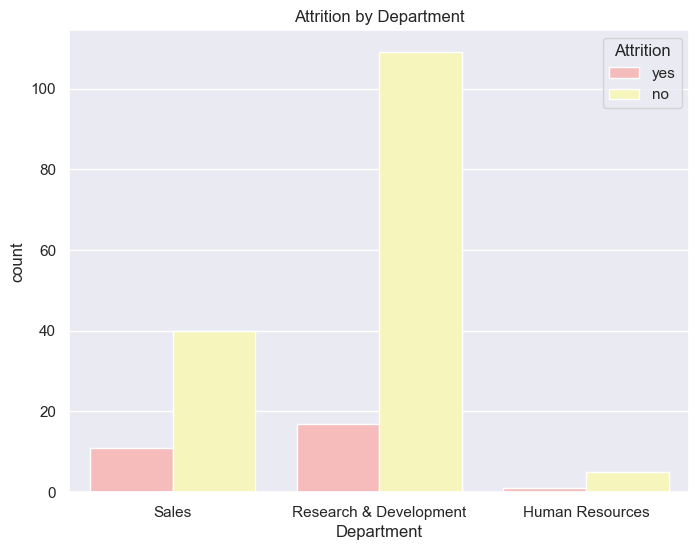

In [84]:
custom_palette = ["#FFB3B3", "#FFFFB3"]
sb.set_style("darkgrid")
plt.figure(figsize=(8,6))
sb.countplot(data=Master_Table, x="Department", hue="Attrition",palette=custom_palette)
plt.title("Attrition by Department")
plt.show()

Since the department consists of significantly more employees than the other departments, the gap is reasonable.

**Job Role Analysis**

The most common role among leaver is "Laboratory Technician" (9 out of 29).

There are 8 different roles, meaning the attrition is not concentrated in a single role, but the "Laboratory Technician" position appears the most.

We will examine the number of leavers in each role compared to the total number of employees in each role.

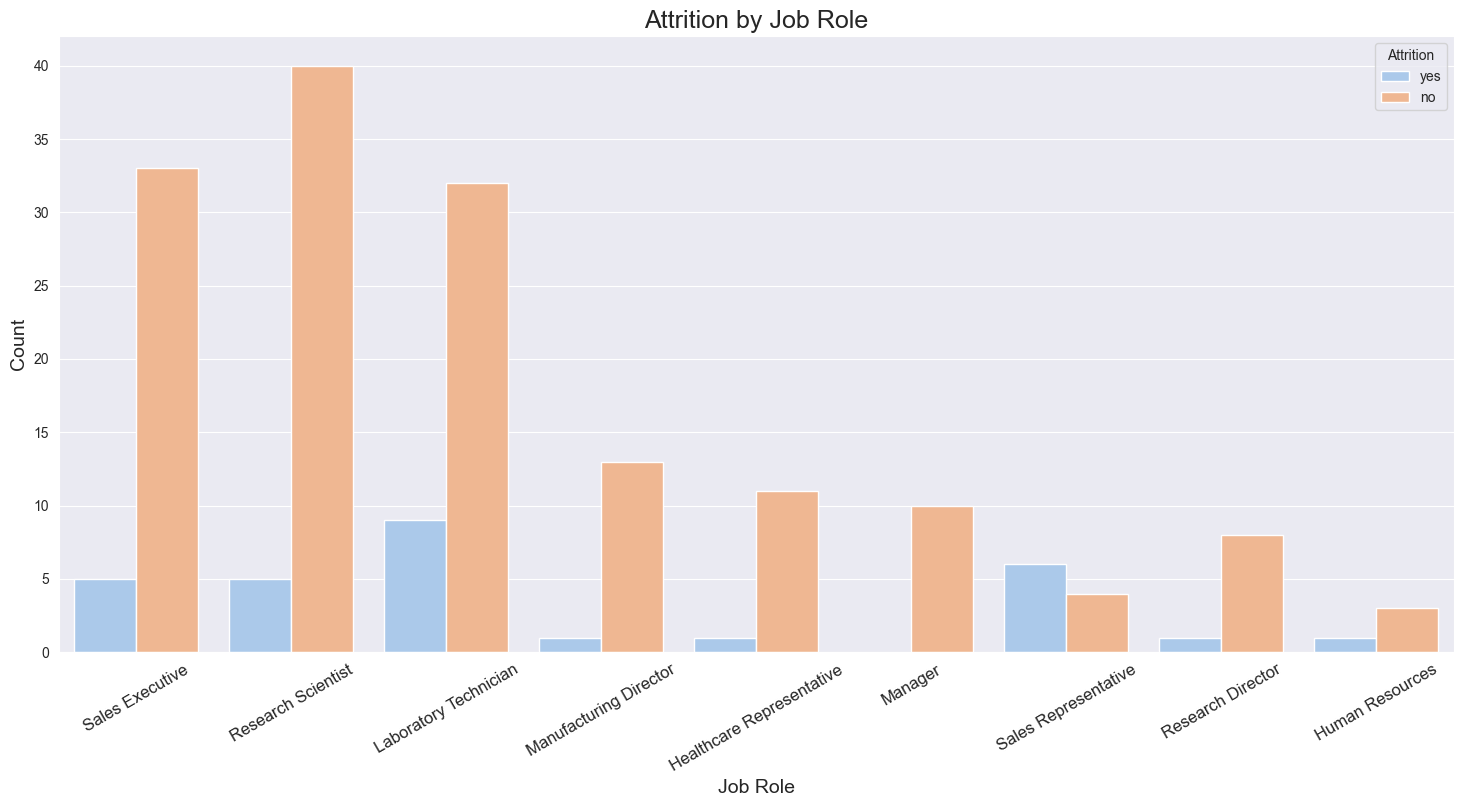

In [39]:
plt.figure(figsize=(18,8))
sb.countplot(data=Master_Table, x="Job_Role", hue="Attrition",palette="pastel")
plt.title("Attrition by Job Role",fontsize=18)
plt.xlabel("Job Role", fontsize=14) 
plt.ylabel("Count", fontsize=14) 
plt.xticks(rotation=30, fontsize=12) 
plt.show()

**Roles with the Highest Attrition Rate:**
    
"Laboratory Technician" and "Sales Executive" have a high number of leavers compared to other roles.

Research Scientist also shows a significant number of departures.

Conclusion:

These roles might be challenging, demanding, or have less favorable working conditions.

The salary in these positions might be lower, leading to higher employee turnover.

**Roles with a Relatively Low Attrition Rate:**

"Manufacturing Director", "Healthcare Representative", "Manager", "Research Director", and "Human Resources" – these roles have very few leavers.

The number of leavers is significantly lower compared to the remaining employees.

Conclusion:

These roles might be more stable, offer higher salaries, or have a clearer career path.

**"Sales Representative" – An Interesting Attrition Rate**

Relative to the number of employees in this role, there is a notable number of leavers, but fewer than in senior sales roles.

Sales pressure might influence employee turnover in this role, though not as significantly as in the Sales Executive position.

**Gender Analysis**

19 out of 29 employees who left are men, meaning approximately 65.5% of the leavers are male.

Now, we will examine whether there are generally more men in the organization or if this is an unusual trend.

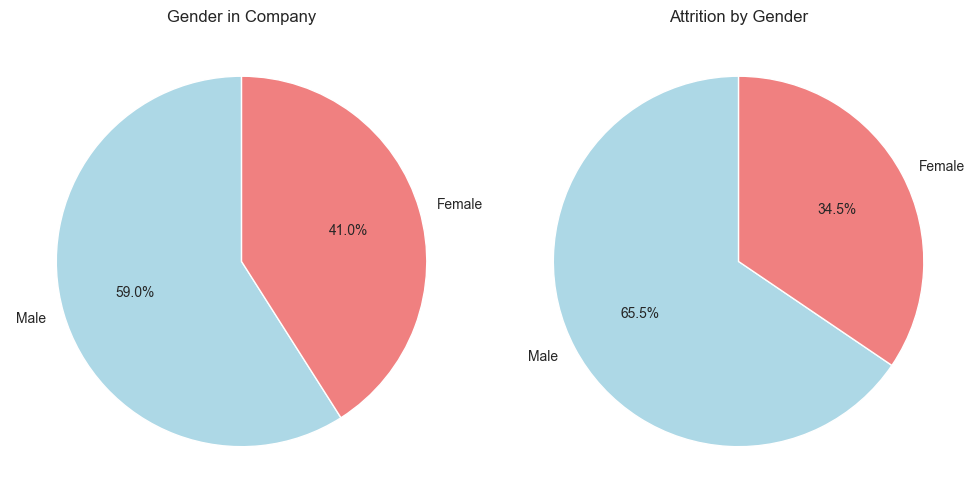

In [41]:

gender_distribution = Master_Table["Gender"].value_counts()
attrition_distribution  = Master_Table[Master_Table["Attrition"] == "yes"]["Gender"].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

axes[0].pie(gender_distribution , labels=gender_distribution .index, autopct='%1.1f%%', colors=["lightblue", "lightcoral"], startangle=90)
axes[0].set_title("Gender in Company")

att = Master_Table[Master_Table["Attrition"] == "yes"]["Gender"].value_counts()

axes[1].pie(attrition_distribution, labels=attrition_distribution.index, autopct='%1.1f%%', colors=["lightblue", "lightcoral"], startangle=90)
axes[1].set_title("Attrition by Gender")
plt.tight_layout()
plt.show()

Since there is a higher percentage of male in the company overall, it is reasonable that more male have left compared to female.

**Education Analysis**

The most common field among those who left: "Life Sciences" (13 out of 29)
There are 6 different fields of study, meaning that people with a background in Life Sciences tend to leave more.

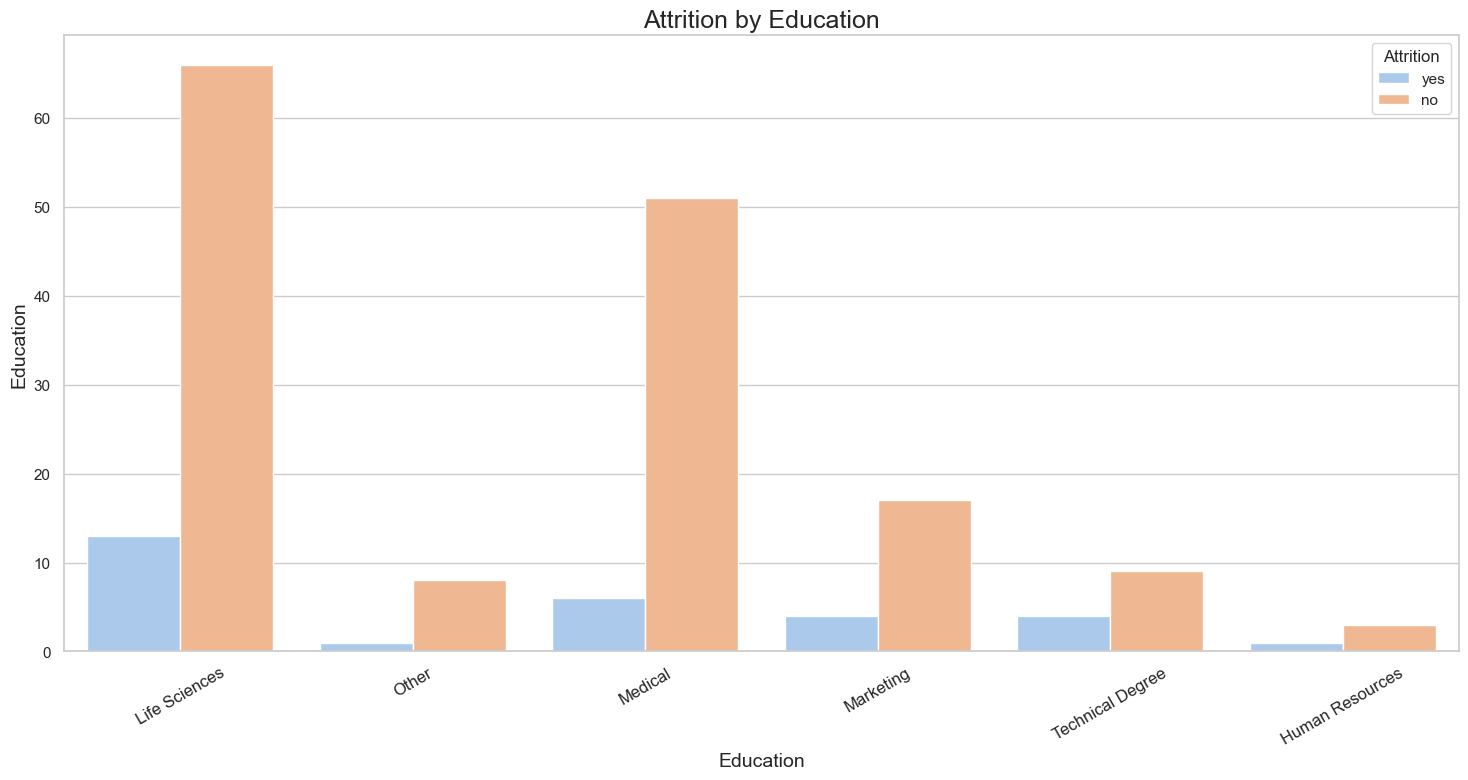

In [82]:
plt.figure(figsize=(18,8))
sb.countplot(data=Master_Table, x="Education_Field", hue="Attrition",palette="pastel")
plt.title("Attrition by Education",fontsize=18)
plt.xlabel("Education", fontsize=14) 
plt.ylabel("Education", fontsize=14) 
plt.xticks(rotation=30, fontsize=12) 
plt.show()

After examining the number of employees in each education field in the company compared to those who left, it can be seen that this field indeed has a significantly larger number of employees than other fields. Therefore, it is logical that there was a higher attrition rate from this field.

On the other hand, in other fields, we can see that there are high attrition rates relative to the total number of employees. We will analyze the attrition percentages to identify which departments are problematic in this regard.

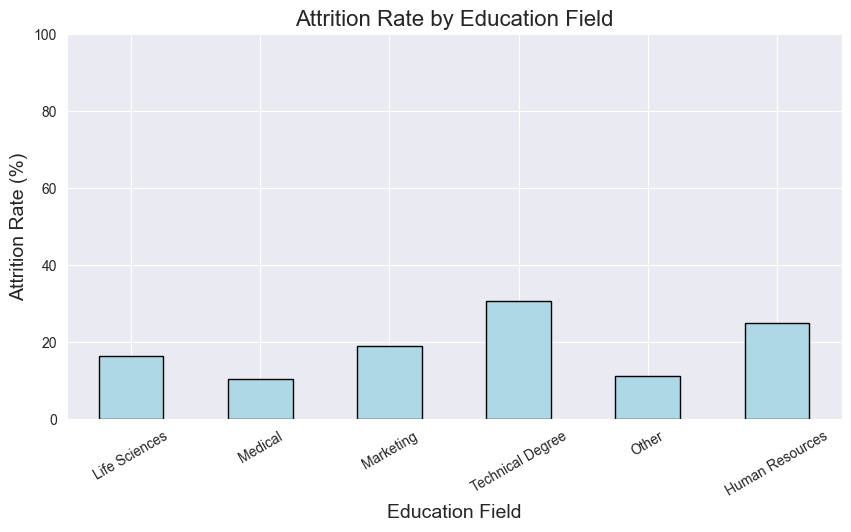

In [56]:
total_by_education = Master_Table["Education_Field"].value_counts()

left_by_education = df_left["Education_Field"].value_counts()

education_attrition_rate = (left_by_education / total_by_education) * 100

plt.figure(figsize=(10,5))
education_attrition_rate.plot(kind="bar", color="lightblue", edgecolor="black")

plt.title("Attrition Rate by Education Field", fontsize=16)
plt.ylabel("Attrition Rate (%)", fontsize=14)
plt.xlabel("Education Field", fontsize=14)
plt.xticks(rotation=30)
plt.ylim(0, 100)  
plt.show()

Conclusions:

Technical Degree has the highest attrition rate.
Employees with technical degrees tend to leave more frequently.

Fields with moderate attrition:
    
Marketing and Human Resources also show relatively high attrition rates.
This could indicate that these fields are less stable or offer more external job opportunities.

Fields with lower attrition rates:

Medical, Life Sciences, and Other fields exhibit lower attrition rates.
This might suggest greater job stability or better working conditions in these fields.

Let's therefore examine the salary levels across each field of study.

C:\Users\tsofiyam\AppData\Local\Temp\ipykernel_504\2789645295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Master_Table, x="Education_Field", y="Monthly_Income", palette="coolwarm")


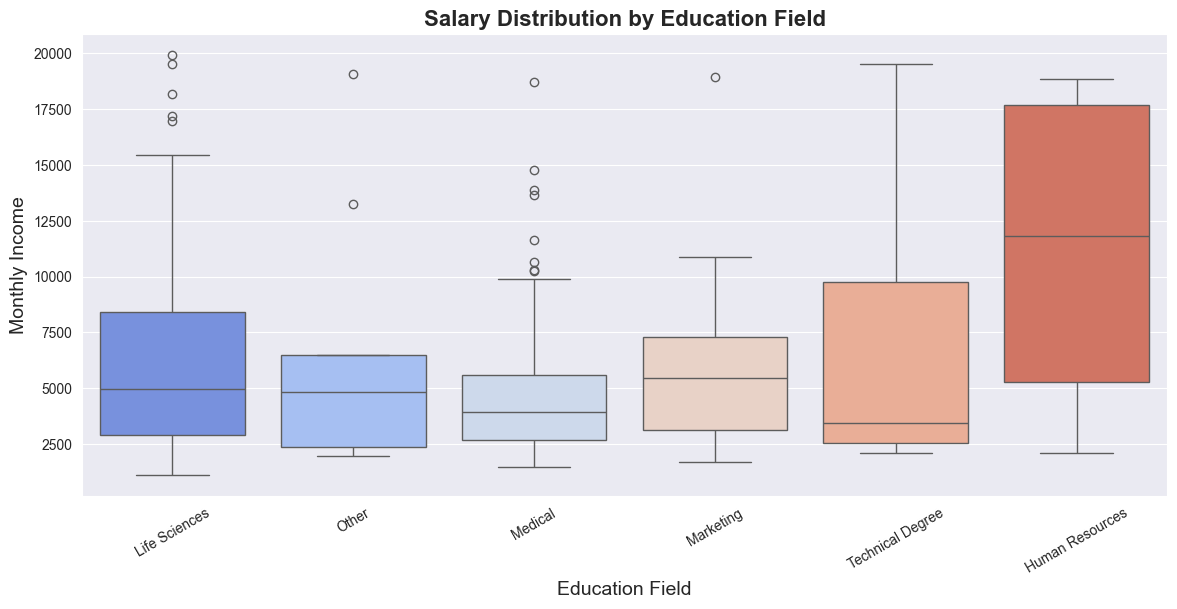

In [59]:
plt.figure(figsize=(14,6))

sns.boxplot(data=Master_Table, x="Education_Field", y="Monthly_Income", palette="coolwarm")

plt.title("Salary Distribution by Education Field", fontsize=16, fontweight="bold")
plt.xlabel("Education Field", fontsize=14)
plt.ylabel("Monthly Income", fontsize=14)
plt.xticks(rotation=30)  
plt.show()


It can be seen from the graph we created that employees in the Technical Degree field earn more than in some other fields, so salary is probably not the reason for their departure. The reasons could be opportunities for promotion elsewhere, working conditions, and so on.

Additionally, in Human Resources, some employees receive very high salaries, which may indicate senior management positions.

In the Life Sciences field, although there are high outliers, the actual median is lower, indicating that the salaries of most employees in this field are not among the highest.

**Marital Status Analysis**

* 19 out of 29 employees who left are single.
* There are 3 marital statuses: married, single, and divorced/widowed.
* Single employees leave significantly more.
Let's examine whether there is a connection between age and attrition.

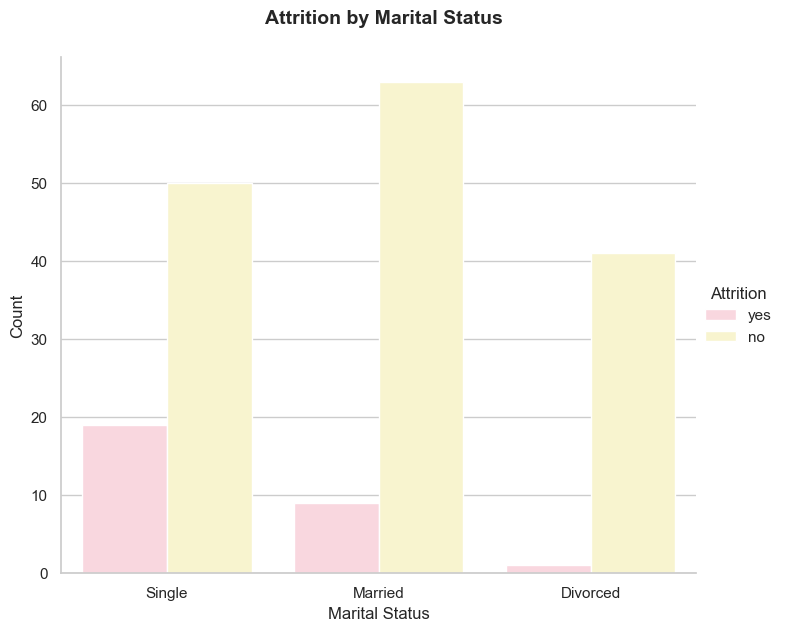

In [80]:
custom_palette = ["#FFD1DC","#FFFAC8" ]
sb.set_theme(style="whitegrid")
g = sb.catplot(data=Master_Table,
    x="Marital_Status",
    hue="Attrition",
    kind="count",
    palette=custom_palette, 
    height=6,        
    aspect=1.2)
g.fig.suptitle("Attrition by Marital Status", y=1.05, fontsize=14, fontweight='bold')
g.set_titles("Attrition by Marital Status")  
g.set_xlabels("Marital Status")           
g.set_ylabels("Count")
plt.show()

It can be understood that single employees leave at a relatively high rate compared to their proportion in the organization, which may indicate a lack of long-term commitment, a desire for greater job flexibility, or dissatisfaction that can be more easily addressed by finding another job.

Married and divorced employees leave much less, possibly due to a greater need for stability, family-related benefits, or other obligations.

# 3.5 **Advanced Analysis**

Here is the advanced analysis I performed on the data:

You can see in the summary table (GroupBy + Aggregation) how the average, median, standard deviation, and the number of employees are calculated for each combination of department and field of study.

The purpose of this table is to provide deeper insights into wage gaps and the size of employee groups in each category, thereby serving as a basis for understanding possible trends within the organization—for example, whether there is higher attrition in groups with lower salaries or with greater salary variance.

In previous chapters, I demonstrated how these data are used in further analysis, including cross-referencing with attrition data, to identify any potential relationship between wage levels and the phenomenon of attrition or other organizational factors.

In [74]:
grouped_data = Master_Table.groupby(["Department", "Education_Field"]).agg({
    'Monthly_Income': ['mean', 'median', 'std'],
    'Employee_ID': 'count'})
grouped_data

Monthly_Income                        \
                                                  mean   median          std   
Department             Education_Field                                         
Human Resources        Human Resources    11148.000000  11837.5  8222.449797   
                       Life Sciences       2942.000000   2942.0          NaN   
                       Medical             5021.000000   5021.0          NaN   
Research & Development Life Sciences       5603.627119   3919.0  4629.207137   
                       Medical             4923.700000   3367.0  3763.823562   
                       Other               6754.125000   4410.0  6208.956398   
                       Technical Degree    7116.888889   4317.0  5987.214658   
Sales                  Life Sciences       8016.105263   7637.0  3435.369136   
                       Marketing           6105.904762   5454.0  4019.324482   
                       Medical             7099.833333   5109.5  3856.231083   
                       Other               4999.000000   4999.0          NaN   
                       Technical Degree    4117.750000   2323.5  3748.505869   

                                        Employee_ID  
                                              count  
Department             Education_Field               
Human Resources        Human Resources            4  
                       Life Sciences              1  
                       Medical                    1  
Research & Development Life Sciences             59  
                       Medical                   50  
                       Other                      8  
                       Technical Degree           9  
Sales                  Life Sciences             19  
                       Marketing                 21  
                       Medical                    6  
                       Other                      1  
                       Technical Degree           4

**Conclusions from the Presented Table:**

**Significant Salary Gaps Between Different Fields and Departments**
* The Human Resources field shows the highest median salary (11,837.5), but with a high standard deviation (8,222), indicating a wide variation in    salaries.
* In contrast, fields like Life Sciences and Medical in certain departments exhibit lower salaries, but with less variance.

**High Salary Variance May Indicate Role Disparities**
* The Technical Degree field has an average salary of approximately 7,116 with a high standard deviation (5,987), suggesting that this field includes both very low-paying positions and significantly higher-paying roles.
* On the other hand, the Medical field within the Research & Development department has a very low median salary (3,367), indicating that employees in this field tend to earn less.

**Different Employee Counts in Each Category**
* The Research & Development department is the largest, with a high number of employees in the Life Sciences (59) and Medical (50) fields.
* The Marketing field under the Sales department has 21 employees, but its median salary (5,454) is lower than that of Life Sciences in the same department (7,637).

**Small Employee Groups Show High Salary Variance**
Categories like Other or Technical Degree contain a small number of employees (4–9), but exhibit high salary variance. This may suggest that there is no consistent salary range within these categories, and the data is influenced by a few individuals.

**Examining Gender Pay Gaps**

In the following graph, we will examine the differences in salaries between men and women in the organization. The graph displays the average salary (in blue) and the standard deviation (in red) for each gender, in order to understand whether there are gaps in the average salary between genders, as well as how diverse or uniform salaries are within each group. This data can provide insight into gender pay gaps and help identify possible trends within the organization

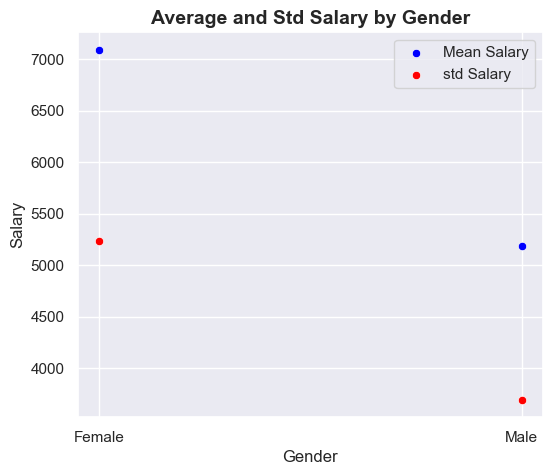

In [91]:
gender_salary = Master_Table.groupby("Gender")["Monthly_Income"].agg(["mean", "std"]).reset_index()

plt.figure(figsize=(6, 5))
sb.scatterplot(data=gender_salary, x="Gender", y="mean", color="blue", label="Mean Salary")
sb.scatterplot(data=gender_salary, x="Gender", y="std", color="red", label="std Salary")

plt.title("Average and Std Salary by Gender", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.legend()
plt.show()

**Graph Analysis**

The graph displays the mean salary and standard deviation of salaries by gender (male and female).

* Blue dots → Represent the average salary for each gender.

It appears that the average salary for men is lower than that of women.
This suggests that, across the organization, women, on average, earn slightly more than men.

* Red dots → Represent the standard deviation of salaries (how dispersed salaries are around the mean).

The standard deviation for women is higher than for men.
This may indicate greater disparities among women’s salaries – possibly due to some women holding high-ranking positions with significantly higher salaries, while others earn lower wages.

For men, the standard deviation is lower, meaning their salaries are more consistent and less spread out.

* Possible Conclusions

1. Gender pay gaps exist – but it seems that women, on average, earn more.

2. Greater salary variance among women – suggesting that the salary differences between women's roles are larger compared to men.

3. Implications of standard deviation – The fact that men’s standard deviation is lower may indicate that their salaries are more uniform and less extreme across different roles.

And now, we will examine the distribution of values based on marital status as well.

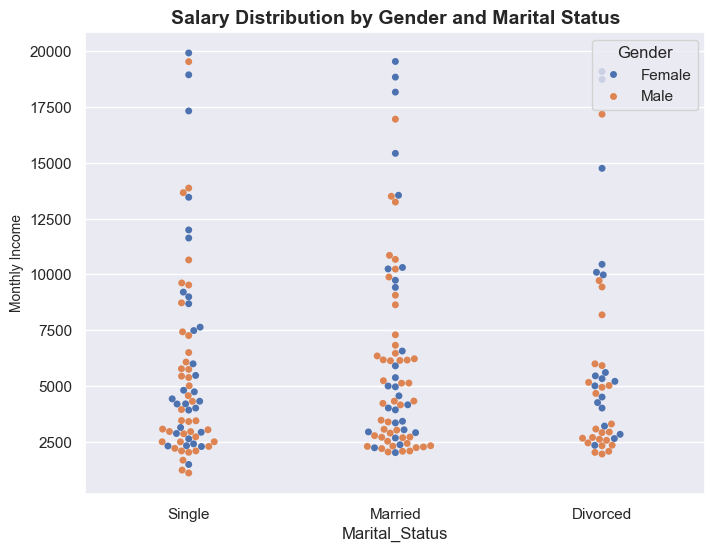

In [101]:
plt.figure(figsize=(8, 6))
sb.swarmplot(data=Master_Table, x="Marital_Status", y="Monthly_Income",hue="Gender")
plt.title("Salary Distribution by Gender and Marital Status", fontsize=14, fontweight="bold")
plt.xlabel("Marital_Status", fontsize=12)
plt.ylabel("Monthly Income", fontsize=10)
plt.legend(title="Gender")
plt.show()

The graph shows certain wage gaps between men and women, especially in the higher salary ranges.

Marital status may be a contributing factor to salary levels, with single employees exhibiting the widest distribution.

# 3.6 **Visualization**

The visualizations were previously performed during the analysis of attrition factors in section 3.4.

# 3.7 **Code Documentation**

I have documented the code in each step with explanatory comments for each line of code.

# 3.8 **Summary and Conclusions - Employee Attrition Data Analysis**

**Introduction**

In this project, employee attrition data was analyzed to identify potential factors influencing the phenomenon. Various data analysis methods were used, including calculations of averages, standard deviations, segmentation analyses, and data cross-referencing with factors such as salary, tenure, department, role, and field of education.

**Analysis of Attrition Factors**

First, 29 employees who left were identified out of a total of 183 employees in the organization. Several key factors were examined to assess their impact on the likelihood of attrition:

* Average Age and Salary of Employees Who Left vs. All Employees

1. The average age of employees who left is slightly lower (35.1 years) compared to all employees (37.03 years). This may be related to younger employees being more likely to leave earlier in their careers due to promotions or a flexible marital status.
2. The average monthly salary of employees who left is lower (4,725.55) compared to all employees (5,967.42). A lower salary may play a significant role in employee attrition.

* Tenure in the Organization

Employees who left had an average tenure of 5.44 years compared to 6.84 years for all employees. This suggests that most employees who left stayed with the organization for several years before leaving, which may indicate a connection between a lack of promotion or a slow salary increase and the decision to leave.

**Analysis of Departments and Roles**

* Departments with High Attrition Rates

The "Research & Development" department recorded the highest number of departures (17 out of 29).
It appears that the attrition rate in this department is particularly high compared to other departments, mainly due to the high proportion of employees in this department.

* Roles with High Attrition Rates

1. The "Laboratory Technician" role has the highest number of departures (9 out of 29).
2. Other roles with high attrition rates include Sales Executive and Research Scientist. These roles may be particularly challenging or have less favorable working conditions.

* Roles with Low Attrition Rates

Manufacturing Director, Healthcare Representative, Manager, and Human Resources roles have low attrition rates.
These roles may be more stable and provide better job security.

**Gender Analysis of Attrition**

65.5% of those who left are men, even though men make up 59% of all employees.
It appears that men have a slightly higher tendency to leave, but the difference is not significant, as we have already shown that there are more men than women in the company.

**Analysis by Education**

Life Sciences is the most common field of education among those who left (13 out of 29).

Employees with a Technical Degree show the highest attrition rate relative to their proportion in the company.
It is possible that employees from these fields are drawn to better external opportunities.

**Advanced Statistical Analysis of Salaries**
    
The mean, median, and standard deviation of salaries were calculated for each department and field of study:

* The Human Resources field had the highest median salary (11,837.5).

* In contrast, fields such as Life Sciences and Medical show lower salaries with low variance.
* The Technical Degree field exhibits high salary variance, possibly due to gaps between senior and junior positions.

**Analysis by Marital Status**

* Single employees leave at a higher rate relative to their proportion in the organization.
This may be due to a lack of long-term commitment, a desire for job flexibility, or dissatisfaction that can be resolved by finding another job.

* Married and divorced employees leave less frequently, possibly due to a greater need for stability, family-related benefits, or other commitments.

**Analysis of Salary Distribution by Gender and Marital Status**

* Gender Pay Gaps

1. Women have higher salary variance, especially in the higher salary ranges.
2. Men's salaries appear more concentrated, indicating fewer disparities within the group.

* Impact of Marital Status
    
1. Single employees exhibit the widest salary distribution, with some earning significantly higher salaries.
2. Married and divorced employees show a more centralized salary distribution, which may suggest a possible influence of stability on salary levels.

This analysis indicates that both gender and marital status may contribute to salary differences within the organization.

# Conclusions and Recommendations

Based on the findings, several key insights can be drawn:

1. Low salaries play a significant role in attrition, especially for younger employees or those in fields such as Life Sciences and Medical.
2. The R&D department experiences the highest attrition rate, and the reasons for this should be examined.
3. Roles such as Laboratory Technician and Sales Executive are at higher risk of attrition, likely due to high workload or better opportunities in the market.
4. Single employees tend to leave more than married and divorced employees, which may indicate their greater flexibility and tendency to seek better job opportunities.
5. High salary variance in certain fields (Technical Degree, Human Resources) suggests role disparities or inconsistent internal promotions.
6. Gender pay gaps are not entirely conclusive, but it appears that women have greater salary variance, which may indicate that some women hold senior positions while others earn very low wages.
7. Marital status may influence salary levels, as married and divorced employees show lower salary dispersion, whereas single employees exhibit higher variance—this may suggest that married and divorced employees maintain greater job stability.
8. The impact of gender on salary varies depending on marital status, and it is important to examine whether there are barriers to promotion or internal biases affecting employees' salaries based on their marital status.

# Recommendations for Action

* Conduct an in-depth analysis of the reasons for attrition in the R&D department through exit interviews or surveys among employees who have left.
* Establish retention programs for single employees, including benefits or fast-track promotion paths to increase their sense of commitment to the organization.
* Review the salary policy and improve transparency within the organization, especially in fields with high variance, to ensure that there are no gender biases or unexplained pay gaps.
* Adjust recruitment and promotion processes to ensure fair opportunities for all employees, regardless of marital status or gender.